In [ ]:
import pandas as pd

In [ ]:
youtube_final = pd.read_csv('/content/yt_data_usa_final_views.txt')
youtube_view = pd.read_csv('/content/yt_data_usa_view_analysis.txt')

In [ ]:
youtube_view.head(5)

,Unnamed: 0,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,0,Action/Adventure,4640224051,225480538,4582592,4.958018,4.859260,0.098758,19380763,0.417669
1,1,Anime/Animation,31468255,1409845,31845,4.581411,4.480213,0.101197,115372,0.366630
2,2,Autos & Vehicles,316674983,12384770,210199,3.977254,3.910877,0.066377,1041495,0.328885
3,3,Comedy,2591868611,136972832,4395842,5.454315,5.284714,0.169601,9695124,0.374059
4,4,Documentary,1043465650,73596270,1115332,7.159948,7.053061,0.106887,5268070,0.504863


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as sts
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [ ]:
# LINEARITY Test

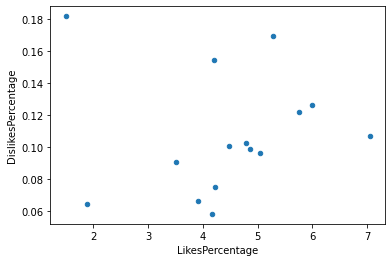

In [ ]:
youtube_view.plot.scatter(x='LikesPercentage', y='DislikesPercentage')
# No signs of proper linearity, but we can see when likes percentage decreases, dislike percentage decreases

In [ ]:
youtube_view.Video_Category.unique()

array(['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles',
       'Comedy', 'Documentary', 'Drama', 'Education', 'Family',
       'Film & Animation', 'Foreign', 'Horror', 'Nonprofits & Activism',
       'People & Blogs', 'Sci-Fi/Fantasy', 'Thriller'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

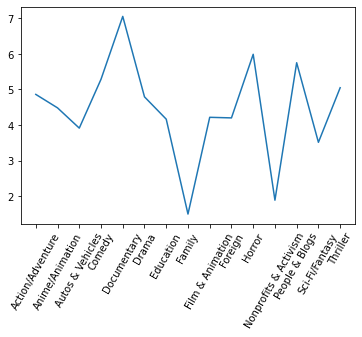

In [ ]:
plt.plot(youtube_view.Video_Category, youtube_view.LikesPercentage)
plt.xticks(rotation=60) 

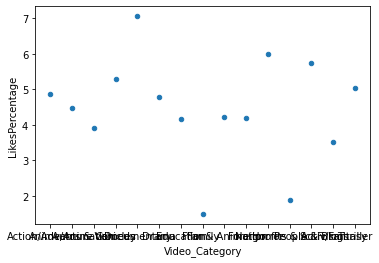

In [ ]:
youtube_view.plot.scatter(x='Video_Category', y='LikesPercentage')

In [ ]:
# CORRELATION test

In [ ]:
youtube_view.corr()
# We can see how each variables are positively correlated to each other

,Unnamed: 0,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
Unnamed: 0,1.000000,0.097464,0.087890,0.095082,-0.147552,-0.147285,-0.016714,0.171524,0.051912
view_count,0.097464,1.000000,0.987880,0.985641,0.223679,0.221454,0.095020,0.956518,0.573665
Likes,0.087890,0.987880,1.000000,0.991276,0.329092,0.326272,0.122428,0.980339,0.670647
Dislikes,0.095082,0.985641,0.991276,1.000000,0.265730,0.260517,0.211276,0.972059,0.640826
Response_Percentage,-0.147552,0.223679,0.329092,0.265730,1.000000,0.999660,0.056865,0.285990,0.642110
LikesPercentage,-0.147285,0.221454,0.326272,0.260517,0.999660,1.000000,0.030818,0.283111,0.634082
DislikesPercentage,-0.016714,0.095020,0.122428,0.211276,0.056865,0.030818,1.000000,0.122807,0.335579
Comments,0.171524,0.956518,0.980339,0.972059,0.285990,0.283111,0.122807,1.000000,0.720516
CommentsPercentage,0.051912,0.573665,0.670647,0.640826,0.642110,0.634082,0.335579,0.720516,1.000000


In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
linreg = smf.ols('Response_Percentage ~ LikesPercentage + DislikesPercentage + CommentsPercentage', youtube_view).fit()
print(linreg.summary())
# We can see that p value of CommentsPercentage at 95% confidence interval is not significant, hence we will remove this from the model

                             OLS Regression Results                            
Dep. Variable:     Response_Percentage   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.099e+30
Date:                 Sat, 23 Apr 2022   Prob (F-statistic):          2.13e-162
Time:                         21:23:32   Log-Likelihood:                 482.84
No. Observations:                   15   AIC:                            -957.7
Df Residuals:                       11   BIC:                            -954.8
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.885e

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
linreg1_1 = smf.ols('Response_Percentage ~ LikesPercentage + DislikesPercentage', youtube_view).fit()
print(linreg1_1.summary())
# Formula -> Response_Percentage = LikesPercentage + DislikesPercentage + 5.967e-15

                             OLS Regression Results                            
Dep. Variable:     Response_Percentage   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 8.694e+29
Date:                 Sun, 24 Apr 2022   Prob (F-statistic):          1.08e-175
Time:                         00:26:10   Log-Likelihood:                 477.38
No. Observations:                   15   AIC:                            -948.8
Df Residuals:                       12   BIC:                            -946.6
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.967e

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
linreg2 = smf.ols('view_count ~ Likes + Dislikes + Comments', youtube_view).fit()
print(linreg2.summary())
# We can see that the p value at 95% confidence interval is more than 0.05 for Dislikes and Comments, 
# hence it means these two variables can't decide whether the views will be more or not. Likes is a perfect variable to predict the number of views for a particular category

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           7.16e-10
Time:                        23:39:38   Log-Likelihood:                -319.92
No. Observations:                  15   AIC:                             647.8
Df Residuals:                      11   BIC:                             650.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.675e+08    1.8e+08      0.932      0.3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
linreg2_1 = smf.ols('view_count ~ Likes', youtube_view).fit()
print(linreg2_1.summary())
# Formula -> view_count = 17.6588*Likes + 3.309e+08 

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     526.6
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           6.66e-12
Time:                        21:31:13   Log-Likelihood:                -322.10
No. Observations:                  15   AIC:                             648.2
Df Residuals:                      13   BIC:                             649.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.309e+08   1.67e+08      1.976      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
youtube_final.head(3)

,Unnamed: 0,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
0,56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-05-30T00:00:00Z,264407389,16021534,150989,6738537,People & Blogs,4
1,3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-28T00:00:00Z,232649205,15735533,714194,6065230,People & Blogs,8
2,4980,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,184778248,11795670,879354,2735997,People & Blogs,9


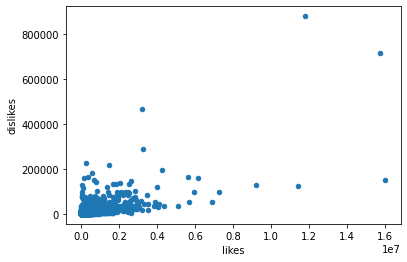

In [ ]:
youtube_final.plot.scatter(x='likes', y='dislikes')

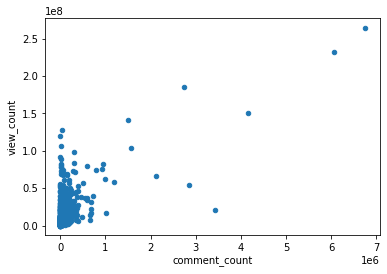

In [ ]:
youtube_final.plot.scatter(x='comment_count', y='view_count')
# It shows a positive linear relationship between comments count and views count

In [ ]:
youtube_final.corr()
# We can see how each variables are positively correlated to each other

,Unnamed: 0,categoryId,view_count,likes,dislikes,comment_count,times_in_trending
Unnamed: 0,1.000000,0.038128,0.036219,0.009530,-0.019039,-0.009607,0.259695
categoryId,0.038128,1.000000,-0.080174,-0.095208,-0.040833,-0.058228,0.005689
view_count,0.036219,-0.080174,1.000000,0.858134,0.707721,0.642583,0.181586
likes,0.009530,-0.095208,0.858134,1.000000,0.677106,0.760582,0.137529
dislikes,-0.019039,-0.040833,0.707721,0.677106,1.000000,0.543899,0.107069
comment_count,-0.009607,-0.058228,0.642583,0.760582,0.543899,1.000000,0.050135
times_in_trending,0.259695,0.005689,0.181586,0.137529,0.107069,0.050135,1.000000


In [ ]:
linreg3 = smf.ols('times_in_trending ~ likes + dislikes + comment_count + view_count', youtube_final).fit()
print(linreg3.summary())
# We can see that the p value at 95% confidence interval is more than 0.05 for likes, 
# hence it means these likes can't decide whether the times it will be trending will be more or not.
# after removing Likes variable, we will see how dislikes p value is more than 0.05 hence we also rejected it

                            OLS Regression Results                            
Dep. Variable:      times_in_trending   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          5.60e-100
Time:                        21:35:20   Log-Likelihood:                -24531.
No. Observations:               11184   AIC:                         4.907e+04
Df Residuals:                   11179   BIC:                         4.911e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.7855      0.023    255.674

In [ ]:
linreg3_1 = smf.ols('times_in_trending ~  comment_count + view_count', youtube_final).fit()
print(linreg3_1.summary())
# Formula -> view_count = (-2.145e-06)*comment_count + (7.29e-08)*view_count + 5.7914

# It shows the inverse relationship between Comments and no of times it was trending

                            OLS Regression Results                            
Dep. Variable:      times_in_trending   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          3.79e-101
Time:                        00:41:25   Log-Likelihood:                -24534.
No. Observations:               11184   AIC:                         4.907e+04
Df Residuals:                   11181   BIC:                         4.910e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.7914      0.022    257.784